<a href="https://colab.research.google.com/github/sid6155330/-Basic_Image_Processing_with_Python_Tkinter-2.0/blob/master/install_holopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/manoharan-lab/holopy.git



Cloning into 'holopy'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (461/461), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 17461 (delta 294), reused 322 (delta 213), pack-reused 17000
Receiving objects: 100% (17461/17461), 9.00 MiB | 28.63 MiB/s, done.
Resolving deltas: 100% (13298/13298), done.


In [13]:
import sys
sys.path.append('/content/drive/MyDrive/S/holopy')

In [14]:
import holopy
print ('done')

done


In [16]:
import holopy as hp
print ('done')

done


In [18]:
!pip install cv

In [21]:
!pip install glob2

In [25]:
!pip install scikit-image


Streaming output truncated to the last 5000 lines.
SSIM for image 1 and depth 2.000000000000001 = 0.5869719788738965 and center are [49.7968405 22.4073382]
SSIM for image 1 and depth 2.0100000000000007 = 0.5814218506527508 and center are [48.82407097 21.72731838]
SSIM for image 1 and depth 2.020000000000001 = 0.5711131331400682 and center are [48.67245577 21.90050317]
SSIM for image 1 and depth 2.030000000000001 = 0.5542763735656803 and center are [48.47566106 21.94906851]
SSIM for image 1 and depth 2.040000000000001 = 0.529279355528207 and center are [47.66392882 21.12635181]
SSIM for image 1 and depth 2.0500000000000007 = 0.4942256940923563 and center are [48.34438649 21.84550422]
SSIM for image 1 and depth 2.060000000000001 = 0.457078345936554 and center are [47.51718927 21.2595391 ]
SSIM for image 1 and depth 2.070000000000001 = 0.4167152133440166 and center are [47.39660804 21.2629397 ]
SSIM for image 1 and depth 2.080000000000001 = 0.3710240130325999 and center are [47.22540074 2

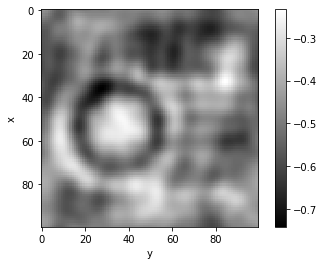

In [26]:
#Import Parameters  
import cv2  
import holopy as hp
from holopy.scattering import calc_holo, Sphere, Spheres
import numpy as np
from holopy.core.process import bg_correct, center_find
from holopy.inference import fit, sample, prior, ExactModel, CmaStrategy, EmceeStrategy

from PIL import Image
import glob   
import random; best_fit_list = []; rsq_error_list = [] 
import pandas as pd
import random; randomlist1=[]

import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


medium_index = 1.46
illum_wavelen = 0.66
illum_polarization = (1,0)
spacing=0.054

## Image template for SSIM
h = hp.load_image('A1.bmp', spacing = 0.054,  medium_index=1.46, illum_wavelen=0.660, illum_polarization=(1,0))
bg = hp.load_image('A2.bmp', spacing = 0.054)
data_holo = bg_correct(h, bg)
rec_vol_img = hp.propagate(data_holo, 2)
hp.save_image('template', rec_vol_img.imag)
hp.show(rec_vol_img.imag)
img1=cv2.imread('template.tif', cv2.IMREAD_ANYCOLOR)
template =  np.asarray(img1, dtype=np.uint8) #converted to uint8

d=1
# Loop Through Hologram Frames 
image_list = []
for filename in glob.glob('/content/drive/MyDrive/test_crowded/*.bmp'): #assuming gif
    im=Image.open(filename)
    
    for i in np.arange (1, 6.1, 0.01):
        h1 = hp.load_image(filename,\
                  spacing = 0.054,  medium_index=1.46, illum_wavelen=0.660, illum_polarization=(1,0))
        data_holo1 = bg_correct(h1, bg)
        rec_vol_img1 = hp.propagate(data_holo1, i)
        hp.save_image('comp', rec_vol_img1.imag)
        #hp.show(rec_vol_img1.imag)
        img2=cv2.imread('/content/comp.tif', cv2.IMREAD_ANYCOLOR)
        comp =  np.asarray(img2, dtype=np.uint8) #converted to uint8 
        ssim_const = ssim(template, comp,data_range=comp.max() - comp.min(), multichannel=True)
        mse_const = mean_squared_error(template, comp)
        center=center_find(rec_vol_img1.imag, centers=1, threshold=0.5, blursize=3.0)
        print ("SSIM for image", d, "and depth", i,"=" ,ssim_const, "and center are", center)       
        # dictionary of lists   
        dict = {'image stack': d, 'depth': i, 'SSIM': ssim_const, 'MSE': mse_const, 'Coordinate1':center[0], 'Coordinate2':center[1]}   
        randomlist1.append(dict)
        df = pd.DataFrame(randomlist1) 
    d+=1
    # saving the dataframe  
    #df.to_csv('extracted_parameters.csv') 
    